# Megan Bohan - MSDS 432 Assignment 1

The purpose of this assignment is to compare the performance of linear/ sequential and binary search.   The final result will compare the time to sort and search the array using each method. 

In [1]:
# import packages, ignore deprecation warnings 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [18]:
#base code for binary search 

def binary_search(list, item):
    #record start time 
    start_time = time.clock()
  
    #low and high keep track of which part of the list you'll search in.
    low = 0
    high = len(list) - 1

    # While you haven't narrowed it down to one element ...
    while low <= high:
        # ... check the middle element
        mid = (low + high) // 2
        guess = list[mid]
        # Found the item.
        if guess == item:
            #record end time 
            end_time = time.clock()
            #calculate run time in ms 
            bin_run_time = (end_time - start_time)*1000
            return bin_run_time
            print(bin_run_time)
        # The guess was too high.
        if guess > item:
            high = mid - 1
        # The guess was too low.
        else:
            low = mid + 1

    #item doesn't exist
    
    #record end time 
    end_time = time.clock()
    #calculate run time in ms 
    bin_run_time = (end_time - start_time)*1000
    return bin_run_time
    print (bin_run_time)

In [19]:
#base code for linear/ sequential search

def linear_search(list, item): 
    #record start time 
    start_time = time.clock()
    
    for i in range(len(list)): 
  
        if list[i] == item: 
            #record end time 
            end_time = time.clock()
            #calculate run time 
            lin_run_time = (end_time - start_time)*1000
            return lin_run_time
            print(lin_run_time)
    
    #item doesn't exist
    #record end time 
    end_time = time.clock()
    #calculate run time 
    lin_run_time = (end_time - start_time)*1000
    return lin_run_time
    #convert to ms
    print (lin_run_time)

In [20]:
#base code for sort

def sort_array(list):
    
    #record start time
    start_time = time.clock()
    
    #sort
    list.sort()
    
    #record end time
    end_time = time.clock()
    
    #calculate sort time in ms
    sort_run_time = (end_time - start_time)*1000
    return sort_run_time
   
    print(sort_run_time)

In [21]:
#generate 5 arrays of random numbers of different sizes with random seed of 96

np.random.seed(96)
array1= np.random.randint(1,10001,512)
array2= np.random.randint(1,10001,1024)
array3= np.random.randint(1,10001,2048)
array4= np.random.randint(1,10001,4096)
array5= np.random.randint(1,10001,8192)

In [22]:
#base code to record length of array, sort time, linear search time, binary search time, 
#linear search + sort, and binary search+ sort

def time_values(list,item):
    
    a = len(list)
    b = sort_array(list)
    c = linear_search(list, item)
    d = binary_search(list, item)
    e = b + c
    f = b + d
    
    values = [a,b,c,d,e,f]
    
    return values
    
    print(values)
    

In [23]:
#generate values for each of the arrays.  The searched value is the maximum value possible in the array.
array1_values = time_values(array1, 10000)
array2_values = time_values(array2, 10000)
array3_values = time_values(array3, 10000)
array4_values = time_values(array4, 10000)
array5_values = time_values(array5, 10000)

In [24]:
#create pandas data frame with values from each array

df1 = pd.DataFrame(array1_values).T
df2 = pd.DataFrame(array2_values).T
df3 = pd.DataFrame(array3_values).T
df4 = pd.DataFrame(array4_values).T
df5 = pd.DataFrame(array5_values).T

#format final data frame
df = pd.concat([df1,df2,df3,df4,df5])
df.columns  = ['Length','Sort_Time','Linear_Time','Binary_Time',
               'Lin_Plus_Sort','Bin_Plus_Sort']
print(df)

   Length  Sort_Time  Linear_Time  Binary_Time  Lin_Plus_Sort  Bin_Plus_Sort
0   512.0      0.312        0.464        0.026          0.776          0.338
0  1024.0      0.407        1.473        0.039          1.880          0.446
0  2048.0      0.139        1.960        0.029          2.099          0.168
0  4096.0      0.463        4.054        0.030          4.517          0.493
0  8192.0      0.642        6.610        0.039          7.252          0.681


[Text(0, 0.5, 'time (ms)'),
 Text(0.5, 0, 'List Length'),
 Text(0.5, 1.0, 'Sort Time + Linear Search Time by List Length')]

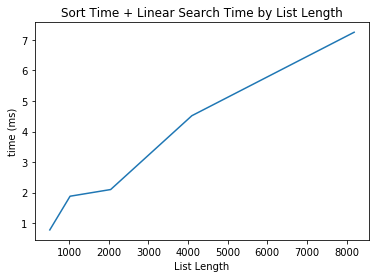

In [26]:
#plot the results of the Linear Search + Sort
fig, lin = plt.subplots()
lin.plot(df.Length, df.Lin_Plus_Sort)

lin.set(xlabel = 'List Length', ylabel = 'time (ms)',
       title = 'Sort Time + Linear Search Time by List Length')

[Text(0, 0.5, 'time (ms)'),
 Text(0.5, 0, 'List Length'),
 Text(0.5, 1.0, 'Sort Time + Binary Search Time by List Length')]

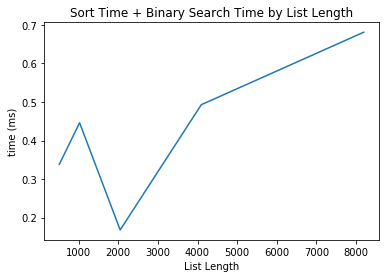

In [27]:
#plot the results of the binary search + sort
fig, lin2 = plt.subplots()
lin2.plot(df.Length, df.Bin_Plus_Sort)

lin2.set(xlabel = 'List Length', ylabel = 'time (ms)',
       title = 'Sort Time + Binary Search Time by List Length')

## Summary

The linear search method looks at each item in the list one by one and evaluates whether or not there is a match with the specified value.  In our case, since the specified value was the maximum value possible in the random array, and the array was sorted from smallest to largest, the search algorithm had to go through the entire list before determining whether or not there was a match.  The performance of this increases at a linear rate (n) over time.   

The binary search method starts in the middle of the list and evalates whether the item we are searching for is either the middle value, or is smaller or larger than that value.  If it is smaller, the algorithm ignores all of the data points larger than the midpoint, and finds the new midpoint between the beginning of the list and the old midpoint.  It proceeds until it finds a match.  If the value is larger, the algorithm ignores all of the data points smaller than the midpoint and finds a new midpoint that is halfway between the old midpoint and the end of the list.  The performance of this algorithm is much better (more like log base 2 n), especially as the lists get larger. 

When the lists are smaller, the values for binary and linear search times are similar. 